# Data Exploration

In [1]:
import pandas as pd

In [2]:
# Mount your drive first
raw_data = pd.read_csv('/content/drive/My Drive/Team 4/WorkOnMergedData/final_merged_data_raw.csv')
cleaned_data = pd.read_csv('/content/drive/My Drive/Team 4/WorkOnMergedData/final_merged_data.csv')

In [3]:
raw_data.head()

,Unnamed: 0,Topic Title,Category,Author,Leading Comment,Other Comments
0,0,About the Product Sourcing Category,Product Sourcing,Trent-Admin,Have questions about sourcing products? This i...,[]
1,1,Price Checker 2 - Competitor storefront extrac...,Product Sourcing,MoniqueAndKerry,Hi! We are new to the forum and are going thro...,['Yes you will need the paid version. Options...
2,2,Top 10 Tips to Grow your Business Rapidly,Product Sourcing,Pradimna_Kumar,As I am working in Amazon as a seller from las...,[]
3,3,Virtual Assistants,Product Sourcing,JimW_PB,"Does anyone have a VA they recommend, have use...",['@McDavid Most don’t want to share any stella...
4,4,Can you sell branded products on Amazon uk,Product Sourcing,Mitch,Can you sell branded products on Amazon Uk or ...,['You can sell on Amazon UK as well. It could...


In [4]:
raw_data['Leading Comment'][0]

'Have questions about sourcing products? This is the category to use. Please be sure to select the most appropriate sub-category for your questions.'

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       8839 non-null   int64 
 1   Topic Title      8839 non-null   object
 2   Category         8839 non-null   object
 3   Author           8839 non-null   object
 4   Leading Comment  8838 non-null   object
 5   Other Comments   8839 non-null   object
dtypes: int64(1), object(5)
memory usage: 414.5+ KB


In [6]:
cleaned_data.head()

,Unnamed: 0,Title,Post Author,Leading Comment,Reply Comments,Category,Forum
0,0,One item multiple buyers,Stocoloco_LLC,Yesterday I lowered the price of an item to ma...,['Isn’t that what you were trying to do??? Mat...,Fulfillment By Amazon,Amazon
1,1,Unavailable payment,storesupplies,I got my new credit card and before I could up...,"['You can’t. You just have to wait.', 'You can...",Fulfillment By Amazon,Amazon
2,2,Some FBA items Not Showing Inventory,ShipFlip,I sent an FBA shipment on November 26. They sh...,['This topic was automatically closed 180 days...,Fulfillment By Amazon,Amazon
3,3,Stock products,Andean_Star,"Hi, I need to know the products stock in Selle...",['You need to have a professional account and ...,Fulfillment By Amazon,Amazon
4,4,Frustrating Seller Support for faulty LTSF cat...,Illuminations_Brand,Just here to vent at the Asia based Seller Sup...,['Illuminations_Brand\nIf you’re here in the U...,Fulfillment By Amazon,Amazon


In [7]:
cleaned_data['Leading Comment'][0]

'Yesterday I lowered the price of an item to match the buy box and now there are five individual orders for that one item. FBA. How? There is only one item in stock, always has been one item.'

In [8]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8841 entries, 0 to 8840
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       8841 non-null   int64 
 1   Title            8841 non-null   object
 2   Post Author      8841 non-null   object
 3   Leading Comment  8840 non-null   object
 4   Reply Comments   8841 non-null   object
 5   Category         8841 non-null   object
 6   Forum            8841 non-null   object
dtypes: int64(1), object(6)
memory usage: 483.6+ KB


In [9]:
cleaned_data.Forum.value_counts()

Amazon      8579
Flowster     262
Name: Forum, dtype: int64

In [10]:
cleaned_data['Reply Comments'][0]

"['Isn’t that what you were trying to do??? Matching the Buy Box helps increase sales…\\nOr are you saying you’ve somehow sold more inventory than you have?', 'Always been just one item', 'So you only had a quantity of 1 in FBA? And 5 sold?\\nCan you share a screenshot of what you’re seeing?', '6E14CA6F-8062-426F-A7E1-35C6973A7A36.jpeg828×1792 204 KB\\n \\nEC73457B-69F0-485A-9921-9DDC953791B8.jpeg828×1792 206 KB\\n \\n4E23C9E9-C057-494C-8F6C-90ABAABB15EE.jpeg828×1792 215 KB\\n \\n4EAED4B8-7076-4E78-86FA-A49F87DB283A.jpeg828×1792 225 KB', 'Pics are out of order but five total', 'That’s how many they ordered, not how many you have in stock.', 'Correct. I only had a quantity of one in fba and five sold', 'Maybe I’m saying it wrong. I listed one , created a shipping order for one and only mailed one to amazon (fba) That’s all I’ve had was one. So I can’t figure out how five different people are in the “process” of buying it.', 'Do you have a different quantity FBM inventory?', 'I’ve had th

In [11]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline

In [12]:
df = cleaned_data.copy()

In [13]:
df.head()

,Unnamed: 0,Title,Post Author,Leading Comment,Reply Comments,Category,Forum
0,0,One item multiple buyers,Stocoloco_LLC,Yesterday I lowered the price of an item to ma...,['Isn’t that what you were trying to do??? Mat...,Fulfillment By Amazon,Amazon
1,1,Unavailable payment,storesupplies,I got my new credit card and before I could up...,"['You can’t. You just have to wait.', 'You can...",Fulfillment By Amazon,Amazon
2,2,Some FBA items Not Showing Inventory,ShipFlip,I sent an FBA shipment on November 26. They sh...,['This topic was automatically closed 180 days...,Fulfillment By Amazon,Amazon
3,3,Stock products,Andean_Star,"Hi, I need to know the products stock in Selle...",['You need to have a professional account and ...,Fulfillment By Amazon,Amazon
4,4,Frustrating Seller Support for faulty LTSF cat...,Illuminations_Brand,Just here to vent at the Asia based Seller Sup...,['Illuminations_Brand\nIf you’re here in the U...,Fulfillment By Amazon,Amazon


In [14]:
df.columns

Index(['Unnamed: 0', 'Title', 'Post Author', 'Leading Comment',
       'Reply Comments', 'Category', 'Forum'],
      dtype='object')

In [15]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8841 entries, 0 to 8840
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            8841 non-null   object
 1   Post Author      8841 non-null   object
 2   Leading Comment  8840 non-null   object
 3   Reply Comments   8841 non-null   object
 4   Category         8841 non-null   object
 5   Forum            8841 non-null   object
dtypes: object(6)
memory usage: 414.5+ KB


In [17]:
df['Post'] = df['Post Author'] + ' ' + df['Title'] + ' ' + df['Leading Comment'] + ' ' + df['Reply Comments']

In [18]:
df.head()

,Title,Post Author,Leading Comment,Reply Comments,Category,Forum,Post
0,One item multiple buyers,Stocoloco_LLC,Yesterday I lowered the price of an item to ma...,['Isn’t that what you were trying to do??? Mat...,Fulfillment By Amazon,Amazon,Stocoloco_LLC One item multiple buyers Yesterd...
1,Unavailable payment,storesupplies,I got my new credit card and before I could up...,"['You can’t. You just have to wait.', 'You can...",Fulfillment By Amazon,Amazon,storesupplies Unavailable payment I got my new...
2,Some FBA items Not Showing Inventory,ShipFlip,I sent an FBA shipment on November 26. They sh...,['This topic was automatically closed 180 days...,Fulfillment By Amazon,Amazon,ShipFlip Some FBA items Not Showing Inventory ...
3,Stock products,Andean_Star,"Hi, I need to know the products stock in Selle...",['You need to have a professional account and ...,Fulfillment By Amazon,Amazon,"Andean_Star Stock products Hi, I need to know ..."
4,Frustrating Seller Support for faulty LTSF cat...,Illuminations_Brand,Just here to vent at the Asia based Seller Sup...,['Illuminations_Brand\nIf you’re here in the U...,Fulfillment By Amazon,Amazon,Illuminations_Brand Frustrating Seller Support...


In [19]:
df['Post'].head()

0    Stocoloco_LLC One item multiple buyers Yesterd...
1    storesupplies Unavailable payment I got my new...
2    ShipFlip Some FBA items Not Showing Inventory ...
3    Andean_Star Stock products Hi, I need to know ...
4    Illuminations_Brand Frustrating Seller Support...
Name: Post, dtype: object

In [20]:
df['Post'][1]

"storesupplies Unavailable payment I got my new credit card and before I could update my Amazon account, they flagged my payment that was due to me on Dec. 18th.  I updated my credit card info but the system is showing that they will hold the payment until my next payment date of Jan 1st.  The amount is about $7000.00 so I would like it now.  Any ideas as to how I can get the funds before Jan 1st? ['You can’t. You just have to wait.', 'You can request an early disbursement and may get it. Never hurts to ask.', 'Amazon mentioned that but the link they referred to wasn’t where they said it was.  Do you know how to request an early disbursement?', 'Call seller support.  Happend to us once, they were able to see the error in the database after the credit card info was updated, and made the payment the next day, and no issues after that.', 'I never noticed a phone number for seller support.', 'Ahhh…  I just talked with seller support.  Talked with 1st person who transferred me to 2nd person

In [21]:
df['Category'].unique()

array(['Fulfillment By Amazon', 'Amazon Sponsored Products',
       'Account Health', 'Selling on Amazon', 'Global Selling', 'Groups',
       'Health,Safety,Sustainability,Security & Compliance',
       'Amazon Marketplace Web Service (MWS)', 'Login With Amazon',
       'Amazon Pay', 'Amazon Custom', 'US Announcements', 'Site Feedback',
       'Financial Management', 'Product Sourcing', 'Human Resources',
       'Amazon Specific', 'Flowster-specific', 'Software & Tools',
       'Fulfillment', 'Traffic Sources', 'Management', 'Misc Topics',
       'eCommerce Marketplaces', 'Store & Website Management'],
      dtype=object)

In [22]:
df['Category'].unique().shape

(25,)

We have 25 category in total.

In [23]:
categories = ['Fulfillment By Amazon', 'Amazon Sponsored Products',
       'Account Health', 'Selling on Amazon', 'Global Selling', 'Groups',
       'Health,Safety,Sustainability,Security & Compliance',
       'Amazon Marketplace Web Service (MWS)', 'Login With Amazon',
       'Amazon Pay', 'Amazon Custom', 'US Announcements', 'Site Feedback',
       'Financial Management', 'Product Sourcing', 'Human Resources',
       'Amazon Specific', 'Flowster-specific', 'Software & Tools',
       'Fulfillment', 'Traffic Sources', 'Management', 'Misc Topics',
       'eCommerce Marketplaces', 'Store & Website Management']

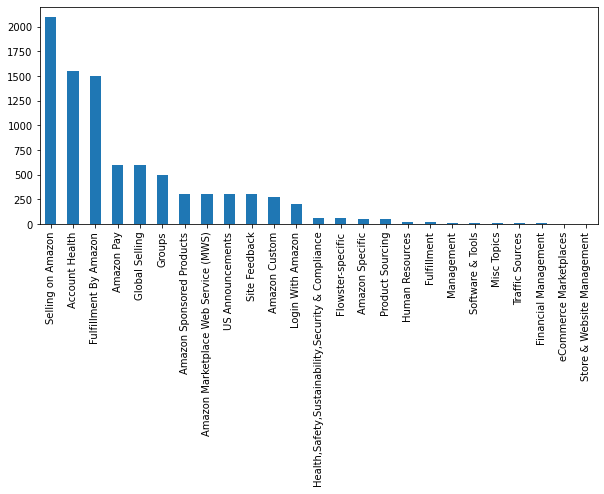

In [24]:
plt.figure(figsize=(10,4))
df.Category.value_counts().plot(kind='bar');

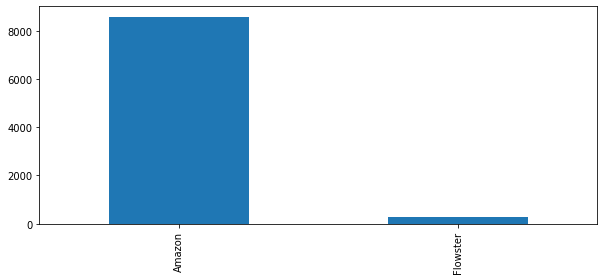

In [25]:
plt.figure(figsize=(10,4))
df.Forum.value_counts().plot(kind='bar');

We have few data points for the last categories compared to the first 12 ones. Nothing surprising seeing as we have more data from the Amazon forum in comparison with the flowster forum.

**Note** that our model may be more biased toward the Amazon categories.
So we may want to tackle this huge imbalance later on if the performance on the Flowster categories is low.

In [26]:
def print_plot(index):
    example = df[df.index == index][['Post', 'Category']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Category:', example[1])
print_plot(10)

Dr_Luka Available inventory Hello everyone. Could you help me understand my situation. I downloaded reports how many amazon received of my inventory. Number is right. And now i know how many i sold and how many is available + reserved. So looks like i miss some items. I am wondering maybe manage inventory doesn’t show all inventory? or i really missing some items (around 80)? ['This topic was automatically closed 180 days after the last reply. New replies are no longer allowed.']
Category: Fulfillment By Amazon


In [27]:
print_plot(30)

AYO_online Organic sales vs PPC sales Dear sellers! There is one interesting question I would like to ask, which might help you determine the efficiency of your PPC campaigns and get some statistics for my article that I am writing. How many organic sales do you get per one PPC sale? For example, let’s imagine that for the past month you have sold 500 units in total. According to the PPC report, out of those 500 sales there were 130 PPC sales. Then, if you make the following calculation: Total sales (500) - PPC sales (130) = 370 370 / PPC sales (130) =  2.84. This number is the coefficient that I am curious about. The greater the coefficient you get, the the results! Let’s see who the winner is! Also, you can provide the category that you sell your item in so we can see the average by category and get more precise data. Thank you ['AYO_online:\n\nLet’s see who the winner is!\n\n\nI can’t wait to see who the winner is.  I am so excited!', 'This topic was automatically closed 180 days af

# Modeling 

In [28]:
!pip install transformers

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

## Loading the Pre-trained BERT model
Let's now load a pre-trained BERT model. 

In [30]:
# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
#model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Right now, the variable `model` holds a pretrained distilBERT model -- a version of BERT that is smaller, but much faster and requiring a lot less memory.

## Model #1: Preparing the Dataset
Before we can hand our sentences to BERT, we need to so some minimal processing to put them in the format it requires.

### Tokenization
Our first step is to tokenize the sentences -- break them up into word and subwords in the format BERT is comfortable with.

In [31]:
df['Post'][0]

"Stocoloco_LLC One item multiple buyers Yesterday I lowered the price of an item to match the buy box and now there are five individual orders for that one item. FBA. How? There is only one item in stock, always has been one item. ['Isn’t that what you were trying to do??? Matching the Buy Box helps increase sales…\\nOr are you saying you’ve somehow sold more inventory than you have?', 'Always been just one item', 'So you only had a quantity of 1 in FBA? And 5 sold?\\nCan you share a screenshot of what you’re seeing?', '6E14CA6F-8062-426F-A7E1-35C6973A7A36.jpeg828×1792 204 KB\\n \\nEC73457B-69F0-485A-9921-9DDC953791B8.jpeg828×1792 206 KB\\n \\n4E23C9E9-C057-494C-8F6C-90ABAABB15EE.jpeg828×1792 215 KB\\n \\n4EAED4B8-7076-4E78-86FA-A49F87DB283A.jpeg828×1792 225 KB', 'Pics are out of order but five total', 'That’s how many they ordered, not how many you have in stock.', 'Correct. I only had a quantity of one in fba and five sold', 'Maybe I’m saying it wrong. I listed one , created a shippi

In [32]:
type(df['Post'][0])

str

In [33]:
df['Post'] = df['Post'].apply(lambda x: str(x))

In [34]:
tokenized = df['Post'].apply((lambda x: tokenizer.encode(x, 
                                                         add_special_tokens=True, 
                                                         max_length=20#[+]10#[-]50#100#200#512
                                                         )))

In [35]:
tokenized[:10]

0    [101, 2358, 24163, 4135, 3597, 1035, 11775, 20...
1    [101, 5324, 6279, 24759, 3111, 20165, 7909, 10...
2    [101, 2911, 10258, 11514, 2070, 1042, 3676, 51...
3    [101, 1998, 11219, 1035, 2732, 4518, 3688, 763...
4    [101, 21203, 2015, 1035, 4435, 25198, 14939, 2...
5    [101, 6708, 1035, 2314, 1035, 1037, 1035, 1367...
6    [101, 28106, 1035, 3019, 2015, 2043, 1037, 226...
7    [101, 7254, 1035, 15463, 9651, 12612, 1045, 25...
8    [101, 28359, 2080, 1035, 1059, 2911, 4712, 195...
9    [101, 24098, 16613, 12612, 2740, 3189, 1011, 6...
Name: Post, dtype: object

### Padding
After tokenization, `tokenized` is a list of sentences -- each sentences is represented as a list of tokens. We want BERT to process our examples all at once (as one batch). It's just faster that way. For that reason, we need to pad all lists to the same size, so we can represent the input as one 2-d array, rather than a list of lists (of different lengths).

In [36]:
max_len = 0
for i in tokenized.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])

In [37]:
np.array(padded).shape

(8841, 20)

In [38]:
np.where(padded != 0, 1, 0)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [39]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(8841, 20)

## Model #1: And Now, Deep Learning!
Now that we have our model and inputs ready, let's run our model!
The `model()` function runs our sentences through BERT. The results of the processing will be returned into `last_hidden_states`.

In [40]:
# 512 crashing
# 200 crashing
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

with torch.no_grad():
    last_hidden_states = model(input_ids, attention_mask=attention_mask)

In [41]:
last_hidden_states[0][:,0,:].shape

torch.Size([8841, 768])

Let's slice only the part of the output that we need. That is the output corresponding the first token of each sentence. The way BERT does sentence classification, is that it adds a token called `[CLS]` (for classification) at the beginning of every sentence. The output corresponding to that token can be thought of as an embedding for the entire sentence.

We'll save those in the `features` variable, as they'll serve as the features to our logitics regression model.

In [42]:
features = last_hidden_states[0][:,0,:].numpy()

In [43]:
labels = df['Category']

## Model #2: Train/Test Split
Let's now split our datset into a training set and testing set.

In [44]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

<img src="https://jalammar.github.io/images/distilBERT/bert-distilbert-train-test-split-sentence-embedding.png" />

### [Bonus] Grid Search for Parameters
We can dive into Logistic regression directly with the Scikit Learn default parameters, but sometimes it's worth searching for the best value of the C parameter, which determines regularization strength.

**NOTE:** For people working on the LR part it would be interesting to run this Grid Search.

In [45]:
# parameters = {'C': np.linspace(0.0001, 100, 20)}
# grid_search = GridSearchCV(LogisticRegression(), parameters)
# grid_search.fit(train_features, train_labels)

# print('best parameters: ', grid_search.best_params_)
# print('best scrores: ', grid_search.best_score_)

We now train the LogisticRegression model. If you've chosen to do the gridsearch, you can plug the value of C into the model declaration (e.g. `LogisticRegression(C=5.2)`).

In [46]:
lr_clf = LogisticRegression()
lr_clf.fit(train_features, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<img src="https://jalammar.github.io/images/distilBERT/bert-training-logistic-regression.png" />

## Evaluating Model #2
So how well does our model do in classifying sentences? One way is to check the accuracy against the testing dataset:

In [47]:
lr_clf.score(test_features, test_labels)

0.49389416553595655

The accuracy (39%) is pretty low 😅 doesn't surprise me seeing as I could only run on a max_seq_length of 10 (which means few keywords to pick).
Updated max_seq_length to 20 (tried 50 but it crashed) and got 49% in accuracy. This means that we should increase the seq length and perhaps lower the batch size to avoid Colab from crashing.

In [56]:
test_labels.unique()

array(['Amazon Pay', 'Account Health', 'Global Selling',
       'Selling on Amazon', 'Fulfillment By Amazon', 'Groups',
       'Health,Safety,Sustainability,Security & Compliance',
       'Flowster-specific', 'Login With Amazon', 'Site Feedback',
       'Amazon Specific', 'Amazon Sponsored Products', 'Amazon Custom',
       'Amazon Marketplace Web Service (MWS)', 'US Announcements',
       'Software & Tools', 'Human Resources', 'Misc Topics',
       'eCommerce Marketplaces', 'Traffic Sources', 'Product Sourcing',
       'Management', 'Fulfillment', 'Financial Management'], dtype=object)

In [57]:
categ = ['Amazon Pay', 'Account Health', 'Global Selling',
       'Selling on Amazon', 'Fulfillment By Amazon', 'Groups',
       'Health,Safety,Sustainability,Security & Compliance',
       'Flowster-specific', 'Login With Amazon', 'Site Feedback',
       'Amazon Specific', 'Amazon Sponsored Products', 'Amazon Custom',
       'Amazon Marketplace Web Service (MWS)', 'US Announcements',
       'Software & Tools', 'Human Resources', 'Misc Topics',
       'eCommerce Marketplaces', 'Traffic Sources', 'Product Sourcing',
       'Management', 'Fulfillment', 'Financial Management']

In [58]:
from sklearn.metrics import classification_report

y_pred = lr_clf.predict(test_features)

print('accuracy %s' % accuracy_score(y_pred, test_labels))
res_logreg = accuracy_score(y_pred, test_labels)
print(classification_report(test_labels, y_pred,target_names=categ))

accuracy 0.49389416553595655
                                                    precision    recall  f1-score   support

                                        Amazon Pay       0.63      0.73      0.67       396
                                    Account Health       0.52      0.19      0.28        80
                                    Global Selling       0.38      0.24      0.29        62
                                 Selling on Amazon       0.44      0.41      0.42       153
                             Fulfillment By Amazon       1.00      0.05      0.10        19
                                            Groups       0.60      0.59      0.60        74
Health,Safety,Sustainability,Security & Compliance       0.00      0.00      0.00         3
                                 Flowster-specific       0.71      0.71      0.71        14
                                 Login With Amazon       0.00      0.00      0.00         4
                                     Site Feedback

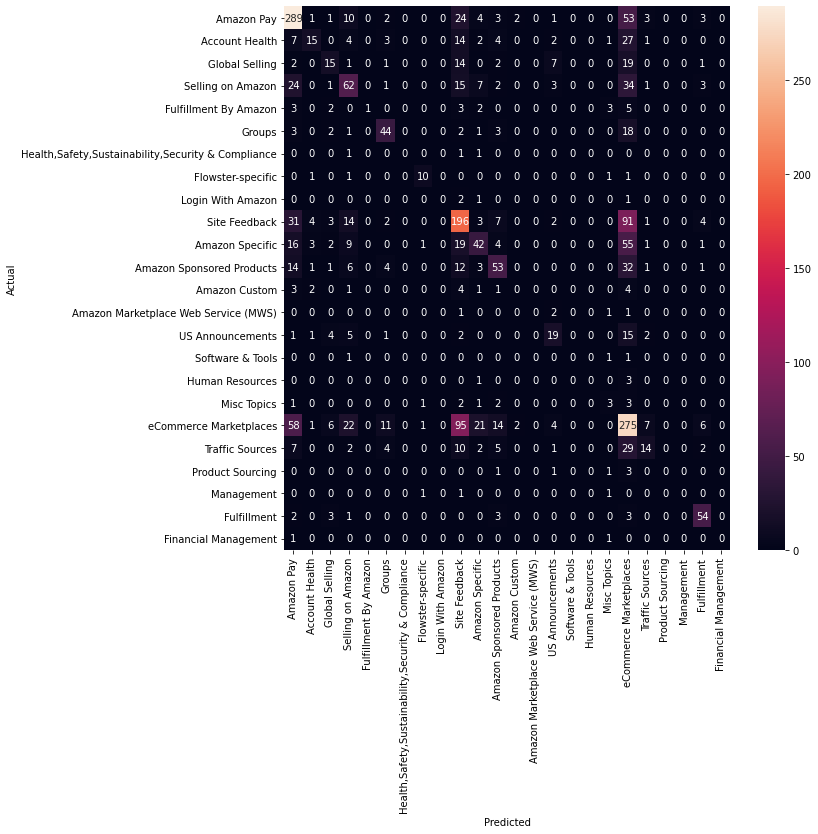

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(test_labels, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=categ, yticklabels=categ)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()